In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100,1)
y = 4+3*X+np.random.randn(100,1)

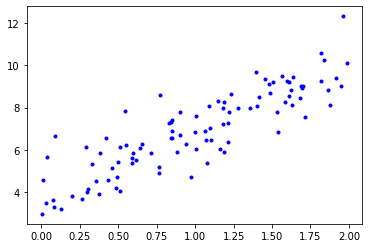

In [ ]:
plt.plot(X,y,"b.")
plt.show()

In [ ]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[3.86690692]
 [3.04715136]]


In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[3.86690692]
 [9.96120964]]


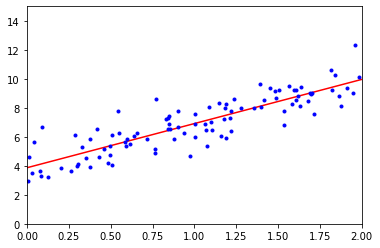

In [ ]:
plt.plot(X_new, y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
lin_reg.predict(X_new)

[3.86690692] [[3.04715136]]


array([[3.86690692],
       [9.96120964]])

In [ ]:
alpha=0.1
n_iterations=1000
m=100
theta=np.random.randn(2,1)

In [ ]:
for iteration in range(n_iterations):
  gradients  =2/m*X_b.T.dot(X_b.dot(theta)-y)
  theta=theta-alpha*gradients
print(theta)

[[3.86690692]
 [3.04715136]]


In [ ]:
def plot_gradient_descent(theta,alpha):
  m=len(X_b)
  plt.plot(X,y,"b.")#scatterplot
  n_iterations=1000
  for iteration in range(n_iterations):
    if iteration < 10:#plotthelinesforthefirst10iterations
      y_predict = X_new_b.dot(theta)
      style="b-" if iteration > 0 else "r--" 
      plt.plot(X_new,y_predict,style)
    gradients=2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta-alpha*gradients
  plt.xlabel("$x_1$",fontsize=18)
  plt.axis([0,2,0,15])
  plt.title(r"$\alpha={}$".format(alpha),fontsize=16)

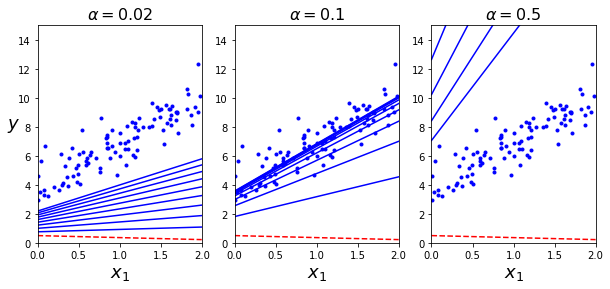

In [ ]:
np.random.seed(42)
theta=np.random.randn(2,1)#randominitialization
plt.figure(figsize=(10,4))
plt.subplot(131);
plot_gradient_descent(theta,alpha=0.02)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.subplot(132);
plot_gradient_descent(theta,alpha=0.1)
plt.subplot(133);
plot_gradient_descent(theta,alpha=0.5)
plt.show()

In [ ]:
n_epochs=50
t0,t1=5,50

def learning_schedule(t):
  return t0/(t+t1)

theta=np.random.randn(2,1)#randominitialization
for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2*xi.T.dot(xi.dot(theta)-yi)
    eta = learning_schedule(epoch*m+i)
    theta = theta-eta*gradients

In [ ]:
from sklearn.linear_model import SGDRegressor 
sgd_reg = SGDRegressor(max_iter=50,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())

print(sgd_reg.intercept_,sgd_reg.coef_)

[3.95082472] [3.13560088]


In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1,solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[8.3894593]])

In [ ]:
from sklearn.linear_model import SGDRegressor 
sgd_reg=SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([8.54509157])

In [ ]:
from sklearn.linear_model import Lasso 
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([8.27435515])

In [ ]:
from sklearn.linear_model import SGDRegressor 
sgd_reg=SGDRegressor(penalty="l1") 
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([8.5516093])

In [ ]:
sgd_reg=SGDRegressor(max_iter=1000,n_iter_no_change=20,early_stopping=True,penalty=None,learning_rate="constant",eta0=0.0005)
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([8.46303883])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import datasets 
iris=datasets.load_iris() 
print(iris.keys())
X=iris["data"][:,3:]
y=(iris["target"]==2).astype(np.int) 

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [ ]:
from sklearn.linear_model import LogisticRegression 
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

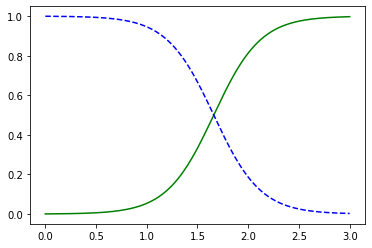

In [ ]:
X_new=np.linspace(0,3,1000).reshape(-1,1)
y_proba=log_reg.predict_proba(X_new)
plt.plot(X_new,y_proba[:,1],"g-",label="Iris-Virginica")
plt.plot(X_new,y_proba[:,0],"b--",label="NotIris-Virginica")